In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [5]:
import tools

In [6]:
data = pd.read_json('data/flink/pr-flat_20220602-13h35m41s_apache_flink_master_prs-brief.txt', lines=True)

In [7]:
data = tools.create_label_dataset(data)
tools.initialize_datetime(data)
data['lifetime'] = tools.add_lifetime_column(data)
data = data.set_index('createdAt')

In [8]:
data = data[['name', 'number', 'lifetime']]
data

,name,number,lifetime
createdAt,,,
2014-06-10 16:51:08+00:00,component=Deployment/YARN,1,0 days 02:51:06
2014-06-10 22:31:31+00:00,component=Runtime/Network,5,6 days 23:47:47
2014-06-11 10:16:58+00:00,component=<none>,6,6 days 12:02:20
2014-06-12 09:00:26+00:00,component=<none>,8,1 days 06:37:45
2014-06-12 14:23:29+00:00,component=<none>,11,0 days 07:03:46
...,...,...,...
2022-06-01 08:12:33+00:00,component=TableSQL/Planner,19860,NaT
2022-06-01 10:34:44+00:00,component=Deployment/YARN,19863,NaT
2022-06-01 12:47:53+00:00,component=Runtime/Checkpointing,19864,NaT


In [9]:
key_none = '<none>'  # A component name used by the api
key_undefined = '<undefined>'  # introduced by us
data['component'] = key_undefined
data['other'] = key_undefined
data.loc[~data['name'].str.startswith('component='), 'other'] = data.loc[~data['name'].str.startswith('component='), 'name'] 
data.loc[data['name'].str.startswith('component='), 'component'] = data.loc[data['name'].str.startswith('component='), 'name'].str.replace('component=', '') 

## Title

In [10]:
recent_data = data.loc[data.index.date >= pd.Timestamp(datetime(2019, 1, 1))].copy()
recent_data_with_lifetime = recent_data.loc[~recent_data['lifetime'].isna()].copy()


/var/folders/m2/_1_4fj9d5554nslmpq2n_bq00000gn/T/ipykernel_20323/2714316584.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  recent_data = data.loc[data.index.date >= pd.Timestamp(datetime(2019, 1, 1))].copy()


In [11]:
lifetime_per_component = recent_data_with_lifetime.groupby('component')['lifetime'].mean().sort_values().sort_index()

In [12]:
open_prs_per_component = recent_data.loc[recent_data['lifetime'].isna(), 'component'].value_counts().sort_index().rename('openPrs')

In [13]:
recent_data

,name,number,lifetime,component,other
createdAt,,,,,
2019-01-01 00:30:13+00:00,component=TableSQL/API,7390,91 days 19:08:41,TableSQL/API,<undefined>
2019-01-01 21:00:37+00:00,component=TableSQL/API,7392,186 days 05:36:34,TableSQL/API,<undefined>
2019-01-02 01:34:27+00:00,component=TableSQL/Client,7393,147 days 01:02:52,TableSQL/Client,<undefined>
2019-01-02 03:09:46+00:00,component=TableSQL/API,7394,0 days 02:34:07,TableSQL/API,<undefined>
2019-01-02 10:26:03+00:00,component=Runtime/Task,7396,206 days 04:21:38,Runtime/Task,<undefined>
...,...,...,...,...,...
2022-06-01 08:12:33+00:00,component=TableSQL/Planner,19860,NaT,TableSQL/Planner,<undefined>
2022-06-01 10:34:44+00:00,component=Deployment/YARN,19863,NaT,Deployment/YARN,<undefined>
2022-06-01 12:47:53+00:00,component=Runtime/Checkpointing,19864,NaT,Runtime/Checkpointing,<undefined>


In [14]:
component_info = pd.concat([lifetime_per_component, open_prs_per_component], axis=1).sort_values(by='lifetime', ascending=False)

In [15]:
with pd.option_context("display.max_rows", component_info.shape[0]):
    print(component_info)

                                                       lifetime  openPrs
Library/MachineLearning             645 days 07:14:06.775510208      NaN
ScalaShell                           97 days 04:27:41.823529412      NaN
Connectors/HadoopCompatibility       83 days 18:23:36.666666667      4.0
flink-docker                         75 days 07:12:44.333333333      NaN
API/DataSet                          55 days 15:22:37.837837838      4.0
Connectors/RabbitMQ                     54 days 06:16:00.625000      1.0
Deployment/Mesos                     46 days 22:41:14.228571428      NaN
API/TypeSerializationSystem          44 days 00:06:17.428571428      8.0
CommandLineClient                    43 days 17:03:30.904109589      7.0
Connectors/JDBC                      43 days 11:43:20.945454545     28.0
Deployment/Kubernetes                41 days 05:05:03.639534883     14.0
Connectors/Pulsar                    40 days 02:18:15.685714285      4.0
Deployment/YARN                      39 days 19:21:

In [16]:
tmp = component_info.loc[~component_info['openPrs'].isna()]
tmp.loc[tmp['openPrs'] >= 10]

,lifetime,openPrs
Connectors/JDBC,43 days 11:43:20.945454545,28.0
Deployment/Kubernetes,41 days 05:05:03.639534883,14.0
Deployment/YARN,39 days 19:21:29.047368421,14.0
Connectors/FileSystem,33 days 13:24:17.720496894,12.0
TableSQL/Client,32 days 05:05:22.763736263,14.0
Formats,32 days 03:31:53.636871508,23.0
chinese-translation,31 days 01:06:21.339207048,36.0
Runtime/StateBackends,30 days 13:56:09.575862069,37.0
Runtime/WebFrontend,30 days 03:24:58.720000,15.0
API/DataStream,27 days 09:12:50.846875,21.0


<AxesSubplot:>

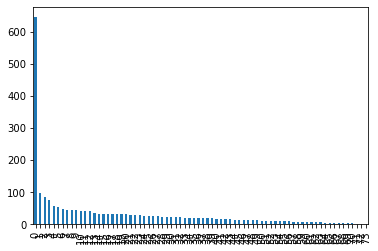

In [17]:
(component_info['lifetime'].dt.total_seconds() / (60 * 60 * 24)).reset_index(drop=True).plot.bar()

In [18]:
data.loc[data['lifetime'].isna(), 'component'].value_counts() / data.loc[data['lifetime'].isna()].shape[0] * 100

<undefined>                       32.189542
Documentation                      6.209150
TableSQL/API                       5.392157
TableSQL/Planner                   4.003268
<none>                             3.431373
Connectors/Hive                    3.349673
Runtime/StateBackends              3.186275
chinese-translation                2.941176
Connectors/Kafka                   2.614379
TableSQL/Runtime                   2.369281
Tests                              2.287582
Connectors/JDBC                    2.287582
TableSQL/Ecosystem                 2.042484
Formats                            1.960784
API/DataStream                     1.879085
Connectors/Common                  1.633987
Runtime/Coordination               1.633987
Runtime/Checkpointing              1.552288
Runtime/WebFrontend                1.307190
Deployment/YARN                    1.143791
Deployment/Kubernetes              1.143791
TableSQL/Client                    1.143791
Connectors/FileSystem           